In [1]:
from hwr.data.generator import IAMSequence
from hwr.constants import ON, SPLIT, DECODER
from hwr.models.ONNET import ONNET
from matplotlib import pyplot as plt
from hwr.decoding.ctc_decode import best_path, beam_search
from hwr.decoding.trie_beam_search import trie_beam_search
from hwr.decoding.mlf import *
import numpy as np

In [2]:
# Load model
model = ONNET(preload=True)

preloading model weights from /home/jasper/Desktop/fyp/HWR/hwr/../models/iamon/ONNET3v2/2019-03-24-00:22:37-a412/weights.h5


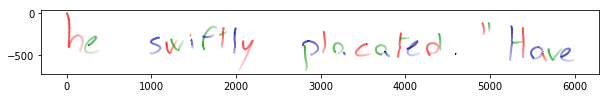

1/1 [==============================] - 1s 1s/step


'he swiftly placated . " Have '

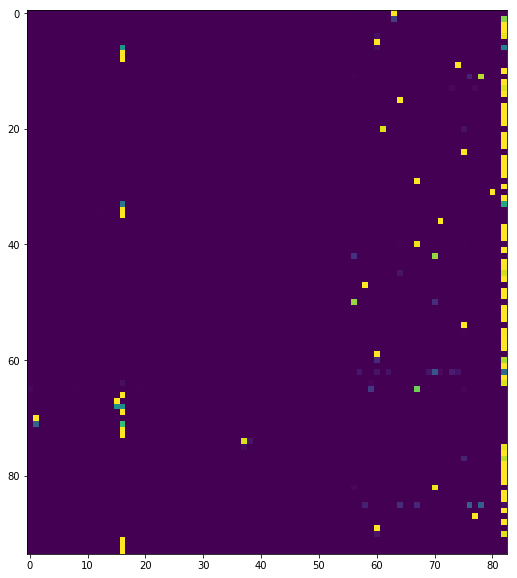

In [3]:
# Sample with pre-decoded output after RNN
pred_seq = IAMSequence(SPLIT.TEST, preprocess=6, npz=True, pred=True, inout_ratio=4)
features, ground_truth, pointset = pred_seq.random_sample()
pointset.plot_strokes()
rnn_out = model.predict_softmax(features)
plt.imshow(rnn_out[0])
ground_truth

In [4]:
best_path_p = best_path(rnn_out)
beam_search_p = beam_search(rnn_out, 25, top_paths=5)
trie_bs_p = trie_beam_search(rnn_out, 25, top_paths=5)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


In [5]:
print("Best path:")
print(best_path_p[0])
print('\n\n')
print("Vanilla beam search:")
for i in range(0, len(beam_search_p[0])):
    print(beam_search_p[0][i])
print('\n\n')
print("Trie beam search:")
for i in range(0, len(trie_bs_p[0])):
    print(trie_bs_p[0][i])

Best path:
he swiftly plocatel . " Houve 



Vanilla beam search:
he swiftly plocatel . " Houve 
he swiftly plocatel . " Howve 
he swiftly plocateol . " Houve 
he swiftly plocateol . " Howve 
he swiftly plocatel . " Hoive 



Trie beam search:
he swiftly placate! . " Howe 
he swiftly placate l . " Howe 
he swiftly placate! . " Hole 
he swiftly placate? . " Howe 
he swiftly placate l . " Hole 
